In [ ]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.utils.io as io
import delfi.summarystats as ds
import lfimodels.glm.utils as utils
import matplotlib.pyplot as plt
import numpy as np

from lfimodels.glm.GLM import GLM
from lfimodels.glm.GLMStats import GLMStats
from delfi.utils.viz import plot_pdf

from DDELFI import DDELFI

%matplotlib inline

In [ ]:
seed = 42
m = GLM(seed=seed)
p = utils.smoothing_prior(n_params=m.n_params, seed=seed)
s = GLMStats(n_summary=m.n_params)
g = dg.Default(model=m, prior=p, summary=s)

true_params, labels_params = utils.obs_params()
obs = utils.obs_data(true_params, seed=seed)
obs_stats = utils.obs_stats(true_params, seed=seed)

In [ ]:
rerun = False  # if False, will try loading file from disk

try:
    assert rerun == False, 'rerun requested'
    sam = np.load('sam.npz')['arr_0']
except:
    sam = utils.pg_mcmc(true_params, obs)
    np.savez('sam.npz', sam)

In [ ]:
seed = 99
g = dg.Default(model=m, prior=p, summary=s)
res = DDELFI(g, 
                   n_components=1,
                   obs=obs_stats, 
                   n_hiddens=[50], 
                   seed=seed, 
                   pilot_samples=1000,
                   reg_lambda=0.01,
                   prior_norm=False)

In [8]:
logs, tds, posteriors, _ = res.run(n_train=5000, 
                                n_rounds=3, 
                                minibatch=100, 
                                epochs=1000,
                                mog_nsteps=-1,
                                mog_lr=0.01,
                                mog_es_rounds=1000)

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5000000), HTML(value='')))

loss=[ 25.24674416]: : 4it [00:00, 27.29it/s]

loss=[ 11.7898941]: : 8619it [04:45, 30.14it/s] 


HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5000000), HTML(value='')))

loss=[ 14.37818718]: : 4it [00:00, 28.62it/s]

loss=[ 11.69233513]: : 2548it [01:06, 38.42it/s]


HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5000000), HTML(value='')))

loss=[ 13.22340965]: : 4it [00:00, 24.62it/s]

loss=[ 11.69492817]: : 1772it [00:45, 38.70it/s]


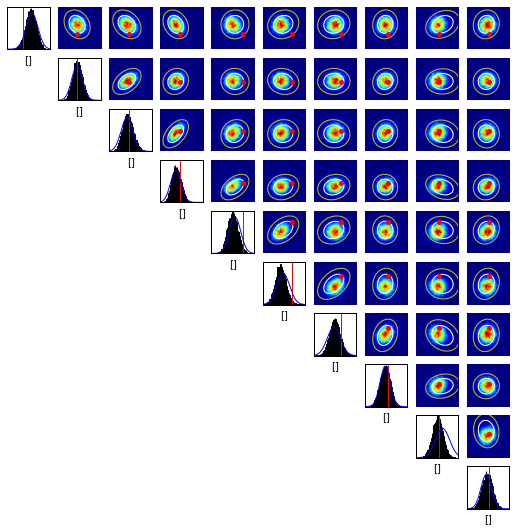

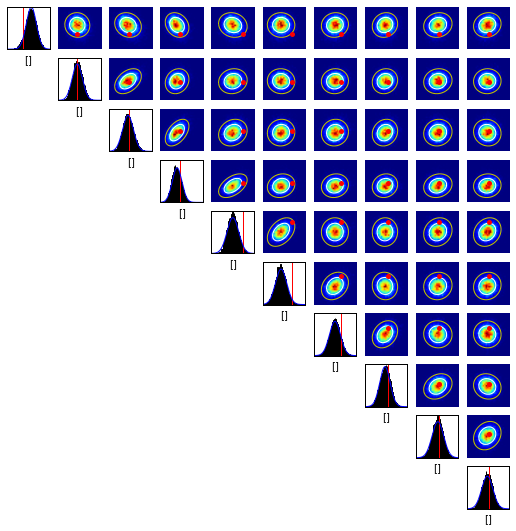

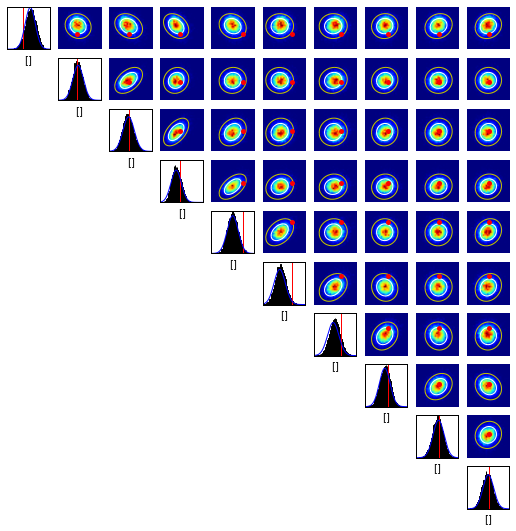

In [9]:
for r in range(3):
    posterior = posteriors[r]
    plot_pdf(posterior.xs[0], 
             lims=[-2,2], 
             samples=sam, 
             gt=true_params, 
             figsize=(9,9));